In [55]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt

In [56]:
df = pd.read_excel('D:\zzKoding\Data Sains - Machine Learning - AI\Lomba\Satria Data 2020\Data\Salinan Data Latih BDC.xlsx')
df_judul = df['judul']
df_narasi = df['narasi']
df_label = df['label']
df.head(10)

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
5,736,1,2020-06-17 00:00:00,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png
6,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
7,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png
8,2098,1,2020-01-09 00:00:00,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg
9,2226,1,2019-12-24 00:00:00,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png


In [57]:
df.shape
df = df.drop(['tanggal', 'nama file gambar'], axis=1)
df.head(10)

,ID,label,judul,narasi
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .
5,736,1,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma..."
6,1161,1,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...
7,1597,1,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...
8,2098,1,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...
9,2226,1,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      4231 non-null   int64 
 1   label   4231 non-null   int64 
 2   judul   4231 non-null   object
 3   narasi  4231 non-null   object
dtypes: int64(2), object(2)
memory usage: 132.3+ KB


In [59]:
df['label'].value_counts()

1    3465
0     766
Name: label, dtype: int64

In [60]:
df['total']=df['judul'] + ' ' + df['narasi']
df.head()

,ID,label,judul,narasi,total
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,Instruksi Gubernur Jateng tentang penilangan ...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...","ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,Foto Kadrun kalo lihat foto ini panas dingin K...


In [61]:
df_t = pd.read_excel('D:\zzKoding\Data Sains - Machine Learning - AI\Lomba\Satria Data 2020\Data\Data Uji BDC.xlsx')
df_t_judul = df_t['judul']
df_t_narasi = df_t['narasi']
df_t_label = df_t['label']
df_t.head()

,ID,tanggal,judul,narasi,nama file gambar,label
0,238057,2020-07-13 00:00:00,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg,1
1,238158,2020-07-06 00:00:00,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg,1
2,238865,2020-04-22 00:00:00,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg,1
3,248298,2019-10-22 00:00:00,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg,1
4,255176,2020-05-01 00:00:00,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg,1


In [62]:
df_t['total']=df_t['judul'] + ' ' + df_t['narasi']
df_t = df_t.drop(['tanggal', 'nama file gambar'], axis=1)
df_t.head()

,ID,judul,narasi,label,total
0,238057,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,1,Narasi Tito Karnavian Berideologi Komunis Kare...
1,238158,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,1,Anies: Seberat beratnya Pekerjaan Akan terasa ...
2,238865,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,1,Hindu di india Melemparkan Patung Buatan Merek...
3,248298,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,1,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...
4,255176,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",1,Permohonan Kelonggaran Angsuran ke OJK Untuk s...


In [63]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [64]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
stop_words = list_stopwords

In [65]:
#preprocessing data training
for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning dengan regular expression
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Menghilangkan stopwords
    words = [w for w in words if not w in stop_words]
    # Lower case
    for words in words:
        filter_sentence = filter_sentence  + ' ' + words.lower()
    
    df.loc[index, 'total'] = filter_sentence

#preprocessing data testing    
for index, row in df_t.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning dengan regular expression
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Menghilangkan stopwords
    words = [w for w in words if not w in stop_words]
    # Lower case
    for words in words:
        filter_sentence = filter_sentence  + ' ' + words.lower()
    
    df_t.loc[index, 'total'] = filter_sentence

In [66]:
df.head(5)

,ID,label,judul,narasi,total
0,71,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,pemakaian masker menyebabkan penyakit legionn...
1,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,instruksi gubernur jateng penilangan yg berma...
2,495,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,foto jim rohn jokowi presiden terbaik dlm sej...
3,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",politik kenyataan pak jokowi berhasil memulan...
4,681,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,foto kadrun kalo lihat foto panas dingin kadr...


In [67]:
#inisiasi x dan y
x_train = df['total']
y_train = df['label']

In [68]:
df_t.head()

,ID,judul,narasi,label,total
0,238057,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,1,narasi tito karnavian berideologi komunis kar...
1,238158,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,1,anies seberat beratnya pekerjaan akan ringan ...
2,238865,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,1,hindu india melemparkan patung buatan mereka ...
3,248298,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,1,rscm praktekkan penyedotan plug venasaluran d...
4,255176,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",1,permohonan kelonggaran angsuran ojk untuk sek...


In [69]:
x_test = df_t['total']
y_test = df_t['label']

In [70]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=1.0)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [71]:
tfidf_train_array = tfidf_train.toarray()
tfidf_test_array = tfidf_test.toarray()
tfidf_train_df = pd.DataFrame(tfidf_train_array)
tfidf_test_df = pd.DataFrame(tfidf_test_array)
display(tfidf_train_df.head())
display(tfidf_test_df.head())

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
print(df_judul.head(3))
print(df_narasi.head(3))
print(df_t_judul.head(3))
print(df_t_narasi.head(3))
print(df_judul[1])

0    Pemakaian Masker Menyebabkan Penyakit Legionna...
1    Instruksi Gubernur Jateng tentang penilangan  ...
2    Foto Jim Rohn: Jokowi adalah presiden terbaik ...
Name: judul, dtype: object
0    A caller to a radio talk show recently shared ...
1    Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2    Jokowi adalah presiden terbaik dlm sejarah ban...
Name: narasi, dtype: object
0    Narasi Tito Karnavian Berideologi Komunis Kare...
1    Anies: Seberat beratnya Pekerjaan Akan terasa ...
2    Hindu di india Melemparkan Patung Buatan Merek...
Name: judul, dtype: object
0    TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...
1    Seberat beratnya Pekerjaan Akan terasa ringan ...
2    Hindu di india melemparkan patung buatan merek...
Name: narasi, dtype: object
Instruksi Gubernur Jateng tentang penilangan  bagi yg tidak bermasker di muka umum Rp.150.000 menggunakan e-tilang Via apps PIKOBAR


In [73]:
angka = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
tanda = ['?', '!', '.', ',', ' ']

#buat dataframe kosong
df_baru_train = pd.DataFrame()

#preprocessing
for index, row in df_judul.iteritems():
    #check apakah di awal angka atau bukan
    if row[0] in angka:
        df_baru_train.loc[index, 'awal_angka'] = 1
    elif row[0] not in angka:
        df_baru_train.loc[index, 'awal_angka'] = 0

    #check jumlah tanda baca
    temp = 0
    for x in row:
        if x in tanda:
            temp += 1
    jumlah_tanda = temp
    df_baru_train.loc[index, 'jumlah_tanda'] = jumlah_tanda
    
    #menghilangkan tanda baca
    sentence = row
    sentence = re.sub(r'[^\w\s]', '', sentence)
    #tokenize
    words = nltk.word_tokenize(sentence)
    #hitung jumlah huruf
    jumlah_huruf = len(words)
    df_baru_train.loc[index, 'jumlah_huruf'] = jumlah_huruf
    if (jumlah_tanda - jumlah_huruf) >= 0:
        df_baru_train.loc[index, 'jumlah_tanda_tak_wajar'] = (jumlah_tanda - jumlah_huruf)
    elif (jumlah_tanda - jumlah_huruf) < 0:
        df_baru_train.loc[index, 'jumlah_tanda_tak_wajar'] = 0
    
    #stop words
    words = [w for w in words if not w in stop_words]
    temp2, temp3 = 0, 0
    for w in words:
        temp3 += 1
        #jika huruf kapital
        if w.isupper() == True: 
            temp2 += 1
    if temp2 == temp3:
        df_baru_train.loc[index, 'kalimat_kapital'] = 1
    elif temp2 != temp3:
        df_baru_train.loc[index, 'kalimat_kapital'] = 0
        
    kata_judul = row
    kata_narasi = df_narasi[index]
    kata_judul = re.sub(r'[^\w\s]', '', kata_judul)
    kata_narasi = re.sub(r'[^\w\s]', '', kata_narasi)
    # Tokenization
    kata_judul = nltk.word_tokenize(kata_judul)
    kata_narasi = nltk.word_tokenize(kata_narasi)
    # Menghilangkan stopwords
    kata_judul = [w.lower() for w in kata_judul if not w in stop_words]
    kata_narasi = [w.lower() for w in kata_narasi if not w in stop_words]
    temp4, temp5 = 0, 0
    for w in kata_narasi:
        temp4 += 1
        if w in kata_judul:
            temp5 += 1
    df_baru_train.loc[index, 'jumlah_keyword'] = temp5
    df_baru_train.loc[index, 'persentase_keyword'] = (temp5/temp4)*100
    
    df_baru_train.loc[index, 'label'] = df_label[index]

In [74]:
df_baru_train['label'] = df_baru_train['label'].astype(int)
# display(df_baru_train[df_baru_train['awal_angka']==1])
display(len(df_baru_train[df_baru_train['jumlah_tanda']>df_baru_train['jumlah_huruf']]))
display(len(df_baru_train[df_baru_train['kalimat_kapital'] == 1]))
display(df_baru_train)

375

254

,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,4.0,5.0,0.0,0.0,2.0,2.272727,1
1,0.0,20.0,18.0,2.0,0.0,3.0,17.647059,1
2,0.0,10.0,11.0,0.0,0.0,10.0,83.333333,1
3,0.0,17.0,15.0,2.0,0.0,19.0,22.619048,1
4,0.0,7.0,8.0,0.0,0.0,6.0,100.000000,1
...,...,...,...,...,...,...,...,...
4226,0.0,8.0,8.0,0.0,0.0,8.0,100.000000,1
4227,0.0,5.0,6.0,0.0,0.0,5.0,23.809524,1
4228,0.0,8.0,9.0,0.0,0.0,1.0,20.000000,1
4229,0.0,12.0,12.0,0.0,0.0,10.0,100.000000,1


In [75]:
angka = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
tanda = ['?', '!', '.', ',', ' ']
df_baru_test = pd.DataFrame()
for index, row in df_t_judul.iteritems():
    if row[0] in angka:
        df_baru_test.loc[index, 'awal_angka'] = 1
    elif row[0] not in angka:
        df_baru_test.loc[index, 'awal_angka'] = 0
    temp = 0
    for x in row:
        if x in tanda:
            temp += 1
    jumlah_tanda = temp
    df_baru_test.loc[index, 'jumlah_tanda'] = jumlah_tanda
    
    sentence = row
    sentence = re.sub(r'[^\w\s]', '', sentence)
    words = nltk.word_tokenize(sentence)
    jumlah_huruf = len(words)
    df_baru_test.loc[index, 'jumlah_huruf'] = jumlah_huruf
    if (jumlah_tanda - jumlah_huruf) >= 0:
        df_baru_test.loc[index, 'jumlah_tanda_tak_wajar'] = (jumlah_tanda - jumlah_huruf)
    elif (jumlah_tanda - jumlah_huruf) < 0:
        df_baru_test.loc[index, 'jumlah_tanda_tak_wajar'] = 0
    
    words = [w for w in words if not w in stop_words]
    temp2, temp3 = 0, 0
    for w in words:
        temp3 += 1
        if w.isupper() == True:
            temp2 += 1
    if temp2 == temp3:
        df_baru_test.loc[index, 'kalimat_kapital'] = 1
    elif temp2 != temp3:
        df_baru_test.loc[index, 'kalimat_kapital'] = 0
        
    kata_judul = row
    kata_narasi = df_t_narasi[index]
    kata_judul = re.sub(r'[^\w\s]', '', kata_judul)
    kata_narasi = re.sub(r'[^\w\s]', '', kata_narasi)
    # Tokenization
    kata_judul = nltk.word_tokenize(kata_judul)
    kata_narasi = nltk.word_tokenize(kata_narasi)
    # Menghilangkan stopwords
    kata_judul = [w.lower() for w in kata_judul if not w in stop_words]
    kata_narasi = [w.lower() for w in kata_narasi if not w in stop_words]
    temp4, temp5 = 0, 0
    for w in kata_narasi:
        temp4 += 1
        if w in kata_judul:
            temp5 += 1
    df_baru_test.loc[index, 'jumlah_keyword'] = temp5
    df_baru_test.loc[index, 'persentase_keyword'] = (temp5/temp4)*100
    
    df_baru_test.loc[index, 'label'] = df_t_label[index]

df_baru_test['label'] = df_baru_test['label'].astype(int)

In [76]:
display(df_baru_train.head(2))
display(df_baru_test.head(2))

df_baru_train = df_baru_train.drop(['jumlah_tanda', 'jumlah_huruf', 'jumlah_keyword'], axis=1)
df_baru_test = df_baru_test.drop(['jumlah_tanda', 'jumlah_huruf', 'jumlah_keyword'], axis=1)

display(df_baru_train.head(2))
display(df_baru_test.head(2))

,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,4.0,5.0,0.0,0.0,2.0,2.272727,1
1,0.0,20.0,18.0,2.0,0.0,3.0,17.647059,1


,awal_angka,jumlah_tanda,jumlah_huruf,jumlah_tanda_tak_wajar,kalimat_kapital,jumlah_keyword,persentase_keyword,label
0,0.0,12.0,13.0,0.0,0.0,7.0,33.333333,1
1,0.0,10.0,11.0,0.0,0.0,7.0,100.000000,1


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword,label
0,0.0,0.0,0.0,2.272727,1
1,0.0,2.0,0.0,17.647059,1


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword,label
0,0.0,0.0,0.0,33.333333,1
1,0.0,0.0,0.0,100.000000,1


In [77]:
train_feature = ['awal_angka', 'jumlah_tanda_tak_wajar', 'kalimat_kapital', 'persentase_keyword']

x_train = df_baru_train[train_feature]
y_train = df_baru_train['label']
x_test = df_baru_test[train_feature]
y_test = df_baru_test['label']

In [78]:
display(tfidf_train_df.head(2))
display(x_train.head(2))
print('tfidf train:', len(tfidf_train_df))
print('x train:', len(x_train))
X_train = pd.concat([tfidf_train_df, x_train], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,2.272727
1,0.0,2.0,0.0,17.647059


tfidf train: 4231
x train: 4231


In [79]:
display(X_train.head(2))

,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272727
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.647059


In [80]:
display(tfidf_test_df.head(2))
display(x_test.head(2))
print('tfidf test:', len(tfidf_test_df))
print('x test:', len(x_test))
X_test = pd.concat([tfidf_test_df, x_test], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,33.333333
1,0.0,0.0,0.0,100.000000


tfidf test: 470
x test: 470


In [81]:
display(X_train.head(2))
display(X_test.head(2))

,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272727
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.647059


,0,1,2,3,4,5,6,7,8,9,...,21186,21187,21188,21189,21190,21191,awal_angka,jumlah_tanda_tak_wajar,kalimat_kapital,persentase_keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000


In [82]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = metrics.f1_score(y_test, pred)
print(score)

0.9441747572815534


In [83]:
display(tfidf_test_df.head(2))
display(tfidf_train_df.head(2))

,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,21182,21183,21184,21185,21186,21187,21188,21189,21190,21191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(tfidf_train_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
tfidf_train_df_pca = pca.transform(tfidf_train_df)
tfidf_test_df_pca = pca.transform(tfidf_test_df)

In [86]:
train_pca = pd.DataFrame(data=tfidf_train_df_pca, columns=['pc1', 'pc2'])
test_pca = pd.DataFrame(data=tfidf_test_df_pca, columns=['pc1', 'pc2'])

In [87]:
train_pca_wlabel = pd.concat([train_pca, y_train], axis=1)

In [88]:
display(train_pca_wlabel.head(2))

,pc1,pc2,label
0,0.043541,-0.092315,1
1,-0.000211,-0.032075,1


In [89]:
for i, row in train_pca_wlabel.iterrows():
    if row['label'] == 1:
        train_pca_wlabel.loc[i, 'label_category'] = 'Hoax'
    else:
        train_pca_wlabel.loc[i, 'label_category'] = 'Non-hoax'

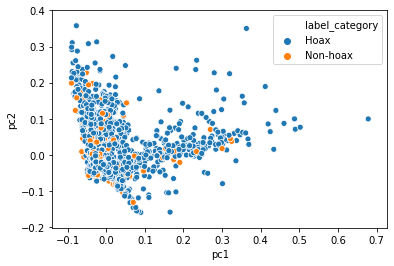

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='pc1', y='pc2', data=train_pca_wlabel, hue='label_category')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data_kata = pd.read_csv('D:\zzKoding\Data Sains - Machine Learning - AI\Lomba\Satria Data 2020\Data\data_kata_csv.csv')
data_kata_lema = [x for x in data_kata.lema]
words = list(data_kata.lema)

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

import itertools
dict(itertools.islice(WORDS.items(), 10))

import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [3]:
!pip install Sastrawi
# stopwords removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop = StopWordRemoverFactory().get_stop_words()

#stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [4]:
sentence = 'ditendang'
print(sentence)
sentence = stemmer.stem(sentence)
print(sentence)

ditendang
tendang


In [6]:
senten = 'ditendang'
if stemmer.stem(senten) != senten:
    print('wuu')

wuu


In [7]:
senten = 'rmah'
if correction(senten) != senten:
    print('woo')

woo
